In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


### Нормальное распределение с неизвестным мат. ожиданием и дисперсией 2.1 :

Мат. ожидание из экспоненциального распределения с параметром 2.5:

In [137]:
a_n = sps.expon.rvs(1/2.5)
sample = sps.norm.rvs(size=1000, loc=a_n, scale=sqrt(2.1))

Эффективная оценка мат. ожидания нормального распределения - <b>выборочное среднее</b>.

Бутстрепная оценка дисперсии для эффективной оценки:

In [352]:
evaluation = sample.cumsum() / np.arange(1, 1001)
but = np.array([])
for i in range(evaluation.size):    
    evss_but = np.array([sps.norm.rvs(size=i + 1, loc=evaluation[i], scale=sqrt(2.1)) for j in range(500)]).mean(axis=1)
    s2 = (evss_but ** 2).mean() - evss_but.mean() ** 2
    but = np.append(but, s2)

Рассмотрим оценку - выборочная медиана:

In [353]:
neff_evaluation = np.array([np.median(sample[:i]) for i in range(1, 1001)])
neff_but = np.array([])
for i in range(neff_evaluation.size):    
    evss_but = np.median(np.array([sps.norm.rvs(size=i+1, loc=neff_evaluation[i], scale=sqrt(2.1)) for j in range(500)]),axis=1)
    s2 = (evss_but ** 2).mean() - evss_but.mean() ** 2
    neff_but = np.append(neff_but, s2)

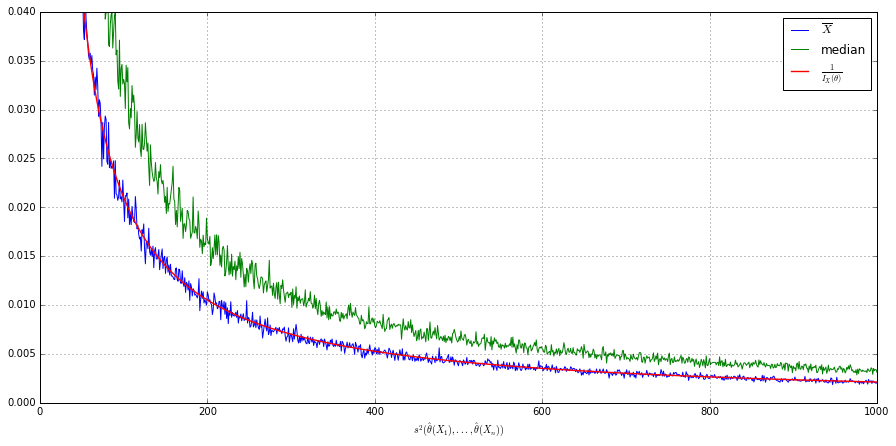

In [357]:
figure(figsize=(15,7))
plot(np.arange(1, 1001), but, label='$\\overline{X}$')
plot(np.arange(1, 1001), neff_but, label='median')
plot(np.arange(1, 1001), np.array([2.1/i for i in np.arange(1, 1001)]), linewidth=1.4, label='$\\frac{1}{I_X(\\theta)}$')
plt.xlabel('$s^2(\\hat{\\theta}(X_1),...,\\hat{\\theta}(X_n))$')
plt.legend()
plt.grid()
plt.ylim(0, 0.04)
plt.show()

Из графика видно, что бутстрепная оценка дисперсии оценки выборочным средним хорошо приближается $\frac{1}{I_x(\theta)}$, что демонстрирует истинность неравенства Рао-Крамера. Видим, что при неэффективной оценке бутстрепная дисперсия больше нижнего порога диспресии. 

### Экспоненциальное распределение

Параметр $a$ из равномерного распределения на отрезке $[0.19; 0.82]$.

In [358]:
a = sps.uniform.rvs(loc=0.19, scale=0.82)
sample = sps.expon.rvs(size=1000, scale=1/a)

Эффективная оценка для $\tau(\theta)=\frac{1}{\theta}$ $-$ выборочное среднее.

In [359]:
evaluation = sample.cumsum() / np.arange(1, 1001)
but = np.array([])
for i in range(evaluation.size):    
    evss_but = np.array([sps.expon.rvs(size=i + 1, scale=evaluation[i]) for j in range(500)]).mean(axis=1)
    s2 = (evss_but ** 2).mean() - evss_but.mean() ** 2
    but = np.append(but, s2)

Оценка - $\frac{1}{2\overline{X}} + \frac{n}{2X_{(1)}}$

In [360]:
def neff_ev(sample):
    return float(1)/2*(sample.mean()) + float(sample.size)/(2*min(sample))

In [361]:
evaluation = np.array([neff_ev(sample[:i + 1]) for i in range(sample.size)])
but_neff = np.array([])
for i in range(evaluation.size):
    evss_but = np.array([])
    for k in range(500):
        evss_but = append(evss_but, neff_ev(sps.expon.rvs(size=i + 1, scale=evaluation[i])))
    s2 = (evss_but ** 2).mean() - evss_but.mean() ** 2
    but_neff = np.append(but_neff, s2)

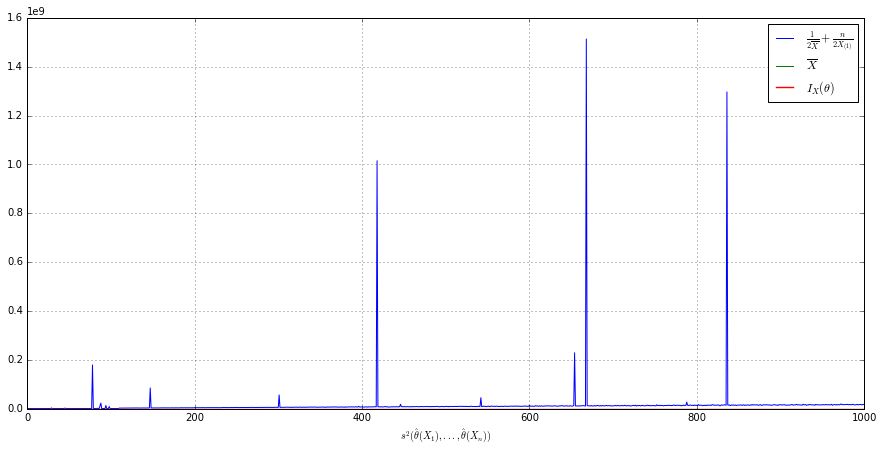

In [368]:
#Получается какая-то жесть, т.к. оценка очень плохо приближает параметр (точнее никак не приближает. даже порядок), 
#видимо, я что-то поняла не так
figure(figsize=(15,7))
plot(np.arange(1, 1001), but_neff, label='$\\frac{1}{2\overline{X}} + \\frac{n}{2X_{(1)}}$')
plot(np.arange(1, 1001), but, label = '$\\overline{X}$')
plot(np.arange(1, 1001), np.array([((1-p)*p)/(50*i) for i in np.arange(1, 1001)]), linewidth=1.4, label='$I_X(\\theta)$')
#plt.ylim(0, 1000000000000000)
plt.xlabel('$s^2(\\hat{\\theta}(X_1),...,\\hat{\\theta}(X_n))$')
plt.grid()
plt.legend()
plt.show()

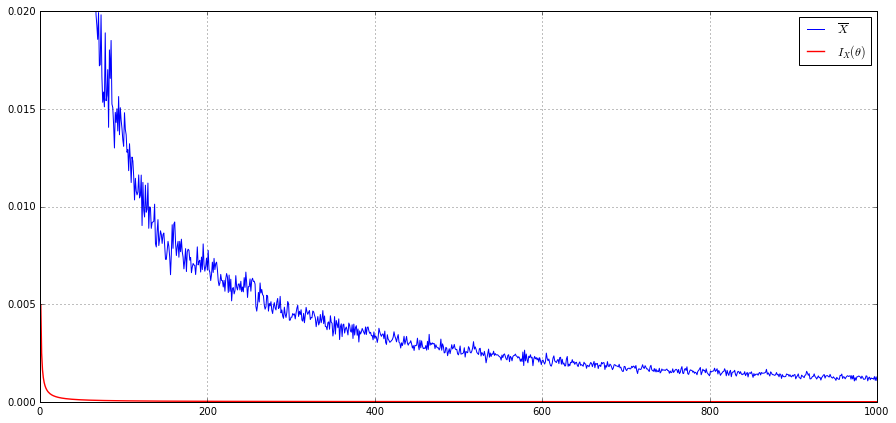

In [372]:
figure(figsize=(15,7))
plot(np.arange(1, 1001), but, label = '$\\overline{X}$')
plot(np.arange(1, 1001), np.array([((1-p)*p)/(50*i) for i in np.arange(1, 1001)]), linewidth=1.4, label='$I_X(\\theta)$', color='r')
plt.ylim(0, 0.02)
plt.legend()
plt.grid()
plt.show()

Бустрепная дисперсия эффективной оценки хорошо приближается нижней границей из неравенства Рао-Крамера, но равенства в неравенстве Рао-Крамера не достигается.

### Биномиальное распределение

Рассмотрим биномиальное распределение с параметрами $m=50$ и параметром $p$ из распределения $cx^5I(0.35 < x < 0.73)$.

In [373]:
class bin_par_gen(sps.rv_continuous):
    def _pdf(self, x):        
        return 6 * (x ** 5)/(0.73**6 - 0.35**6)
bin_par = bin_par_gen(a=0.35, b=0.73)
p = bin_par.rvs()
m = 50

Эффективная оценка для $p$ биномиального распределения - $\frac{\overline{X}}{m}$.

$I_x(\theta)=\frac{nm}{p(1-p)}$

Найдем для каждого $n$ эффективную оценку выборки и бутстрепную оценку дисперсии.

In [374]:
sample = sps.binom.rvs(n=m, p=p, size=1000)

In [375]:
evaluation = (sample.cumsum() / np.arange(1, 1001))/float(m)
but = np.array([])
for i in range(evaluation.size):    
    evss_but = (np.array([sps.binom.rvs(size=i + 1, n=m, p=evaluation[i]) for j in range(500)]).mean(axis=1))/float(m)
    s2 = (evss_but ** 2).mean() - evss_but.mean() ** 2
    but = np.append(but, s2)

Сравним результат с оценкой $\frac{X_{1}}{m}$:

In [376]:
X1 = sample[1]
ev = X1/float(50)
but_neff = np.array([])
for i in range(1000):    
    evss_but = (np.array([sps.binom.rvs(size=i + 1, n=m, p=ev)[0] for j in range(500)]))/float(m)
    s2 = (evss_but ** 2).mean() - evss_but.mean() ** 2
    but_neff = np.append(but_neff, s2)

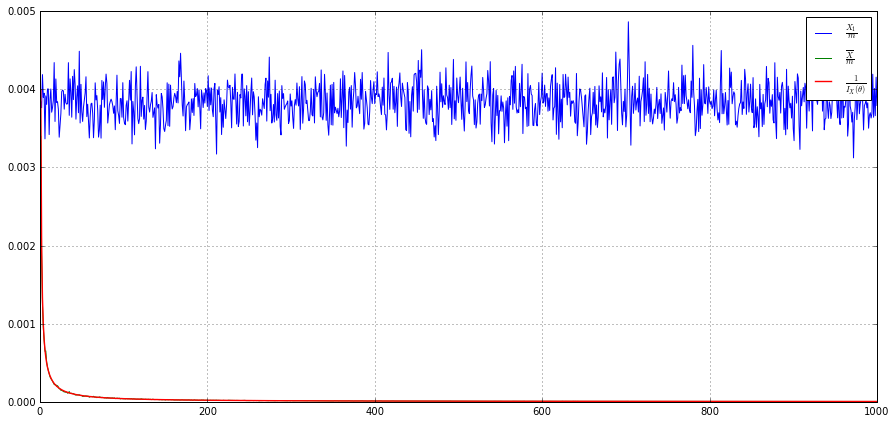

In [377]:
figure(figsize=(15,7))
plot(np.arange(1, 1001), but_neff, label='$\\frac{X_1}{m}$')
plot(np.arange(1, 1001), but, label='$\\frac{\\overline{X}}{m}$')
plot(np.arange(1, 1001), np.array([((1-p)*p)/(50*i) for i in np.arange(1, 1001)]), linewidth=1.4, label='$\\frac{1}{I_X(\\theta)}$')
plt.legend()
plt.grid()
plt.show()

Сравнение бутстрепной оценки диспресии и дисперсии из неравенства Рао-Крамера:

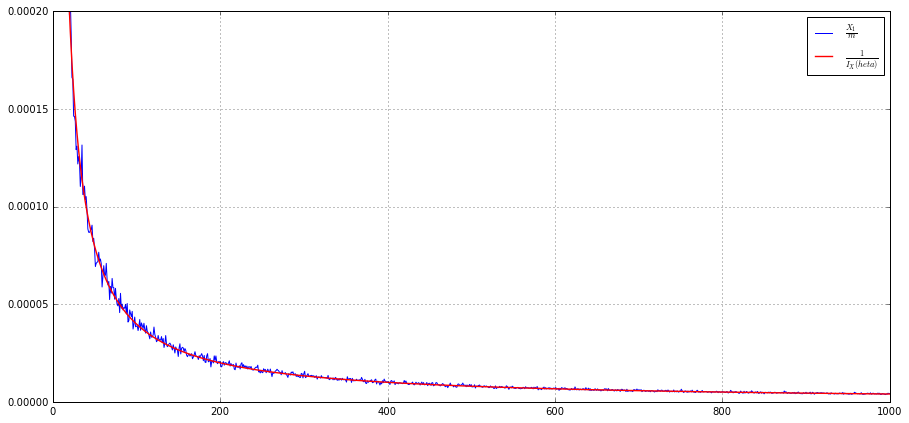

In [379]:
figure(figsize=(15,7))
plot(np.arange(1, 1001), but, label='$\\frac{X_1}{m}$')
plot(np.arange(1, 1001), np.array([((1-p)*p)/(50*i) for i in np.arange(1, 1001)]), color='r', linewidth=1.4, label='$\\frac{1}{I_X(\theta)}$')
plt.ylim(0, 0.0002)
plt.legend()
plt.grid()
plt.show()

Бустрепная дисперсия эффективной оценки хорошо приближается нижней границей из неравенства Рао-Крамера.